In [32]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [33]:
#Get the data into Pandas Dataframe object
#column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('rating.csv', sep = ',')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [34]:
#Get the Movie Titles
movie_titles = pd.read_csv('movie.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
#Merge the dataset with movie titles
df = pd.merge(df, movie_titles, on = 'movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),Adventure|Children|Fantasy


In [36]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Small Roads (2011)                   5.0
Divorce (1945)                       5.0
The Beautiful Story (1992)           5.0
Into the Middle of Nowhere (2010)    5.0
The Sea That Thinks (2000)           5.0
Name: rating, dtype: float64

In [37]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

In [38]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667
$ (Dollars) (1971),2.833333
$5 a Day (2008),2.871795
$9.99 (2008),3.009091
$ellebrity (Sellebrity) (2012),2.000000


In [39]:
ratings['numOfRatings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,numOfRatings
title,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.833333,24
$5 a Day (2008),2.871795,39
$9.99 (2008),3.009091,55
$ellebrity (Sellebrity) (2012),2.000000,2


<AxesSubplot:>

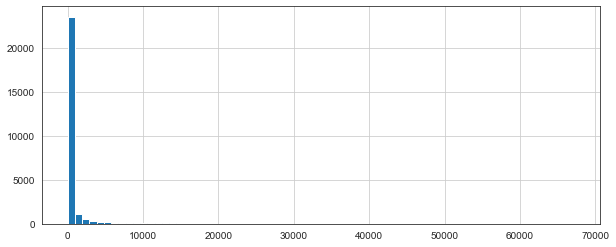

In [40]:
plt.figure(figsize = (10,4))
ratings['numOfRatings'].hist(bins = 70)

<AxesSubplot:>

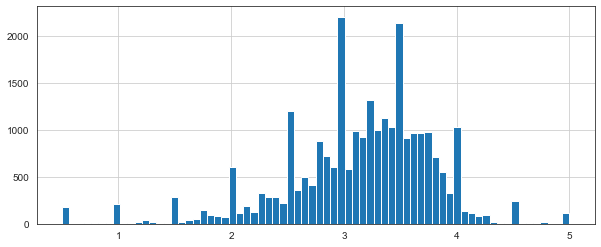

In [41]:
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 70)

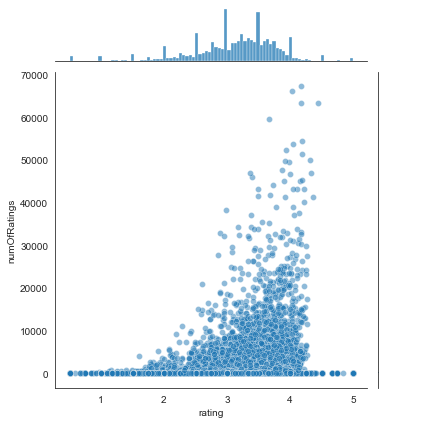

In [42]:
sns.jointplot(x='rating', y='numOfRatings', data = ratings, alpha = 0.5)

Create the Recommendation System

In [44]:
from scipy.sparse import csr_matrix
from pandas.api.types import CategoricalDtype


# Create lists of unique users and items
user_u = list(sorted(df.userId.unique()))
item_u = list(sorted(df.title.unique()))

# Define the categorical types
user_type = CategoricalDtype(categories=user_u, ordered=True)
item_type = CategoricalDtype(categories=item_u, ordered=True)

# Convert user and item columns to categorical codes
row = df.userId.astype(user_type).cat.codes
col = df.title.astype(item_type).cat.codes

# Create the sparse matrix
data = df['rating'].tolist()
sparse_matrix = csr_matrix((data, (row, col)), shape=(len(user_u), len(item_u)))

# Create the SparseDataFrame
moviemat = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, index=user_u, columns=item_u)

moviemat.head()

,#chicagoGirl: The Social Network Takes on a Dictator (2013),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),$ellebrity (Sellebrity) (2012),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Neath the Arizona Skies (1934),'R Xmas (2001),...,¡Qué hacer! (1970),¡Three Amigos! (1986),À l'aventure (2008),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Árido Movie (2005),Åsa-Nisse - Wälkom to Knohult (2011),Üvegtigris (2001),貞子3D (2012)
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#Most Rated Movies with their Average Ratings
ratings.sort_values('numOfRatings', ascending = False).head(10)

,rating,numOfRatings
title,,
Pulp Fiction (1994),4.174231,67310
Forrest Gump (1994),4.029000,66172
"Shawshank Redemption, The (1994)",4.446990,63366
"Silence of the Lambs, The (1991)",4.177057,63299
Jurassic Park (1993),3.664741,59715
Star Wars: Episode IV - A New Hope (1977),4.190672,54502
Braveheart (1995),4.042534,53769
Terminator 2: Judgment Day (1991),3.931954,52244
"Matrix, The (1999)",4.187186,51334


In [58]:
matrixUserRatings=moviemat['Matrix, The (1999)']
similarToMatrix = moviemat.corrwith(matrixUserRatings)
corr_Matrix = pd.DataFrame(similarToMatrix, columns = ['Correlation'])
corr_Matrix.dropna(inplace = True)
corr_Matrix = corr_Matrix.join(ratings['numOfRatings'])
corr_Matrix[corr_Matrix['numOfRatings'] > 100].sort_values('Correlation', ascending = False).head()

,Correlation,numOfRatings
"Matrix, The (1999)",1.000000,51334
"Lord of the Rings: The Fellowship of the Ring, The (2001)",0.522357,37553
Fight Club (1999),0.509282,40106
"Sixth Sense, The (1999)",0.498338,39028
Star Wars: Episode V - The Empire Strikes Back (1980),0.489892,45313


In [59]:
for i in ratings.index:
    movieUserRatings = moviemat[i]
    similarToThatMovie = moviemat.corrwith(movieUserRatings)
    corr_toMovie = pd.DataFrame(similarToThatMovie, columns = ['Correlation'])
    corr_toMovie.dropna(inplace = True)
    corr_toMovie = corr_toMovie.join(ratings['numOfRatings'])
    result = corr_toMovie[corr_toMovie['numOfRatings'] > 100].sort_values('Correlation', ascending = False).head()
    if result['numOfRatings'].count() >= 5:
        print(i)
        ratings.loc[i, 'FirstMovieRecommendation'] = result.iloc[1:2].index.values[0]
        ratings.loc[i, 'SecondMovieRecommendation'] = result.iloc[2:3].index.values[0]
        ratings.loc[i, 'ThirdMovieRecommendation'] = result.iloc[3:4].index.values[0]
        ratings.loc[i, 'FourthMovieRecommendation'] = result.iloc[4:5].index.values[0]

#chicagoGirl: The Social Network Takes on a Dictator (2013)
$ (Dollars) (1971)
$5 a Day (2008)
$9.99 (2008)
$ellebrity (Sellebrity) (2012)
'71 (2014)
'Hellboy': The Seeds of Creation (2004)
'Human' Factor, The (Human Factor, The) (1975)
'Neath the Arizona Skies (1934)
'R Xmas (2001)
'Round Midnight (1986)
'Salem's Lot (2004)
'Til There Was You (1997)
'Twas the Night Before Christmas (1974)
'burbs, The (1989)
'night Mother (1986)
(500) Days of Summer (2009)
(A)sexual (2011)
(Absolutions) Pipilotti's Mistakes ((Entlastungen) Pipilottis Fehler) (1988)
(Untitled) (2009)
*batteries not included (1987)
+1 (2013)
...All the Marbles (California Dolls, The) (1981)
...And God Spoke (1993)
...And Justice for All (1979)
...tick... tick... tick... (1970)
.45 (2006)
009 Re: Cyborg (2012)
1 (2013)
1, 2, 3, Sun (Un, deuz, trois, soleil) (1993)
1-900 (06) (1994)
10 (1979)
10 000 timmar (2014)
10 Items or Less (2006)
10 MPH (2007)
10 Mountains 10 Years (2010)
10 Questions for the Dalai Lama (2006)
10 Ri

KeyboardInterrupt: 

In [63]:
#Check the result 
ratings.head(70)

,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
title,,,,,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3,Panic in the Streets (1950),Billy Jack Goes to Washington (1977),"Story of Qiu Ju, The (Qiu Ju da guan si) (1992)",Alice's Restaurant (1969)
$ (Dollars) (1971),2.833333,24,City Heat (1984),36 Quai des Orfèvres (Department 36) (2004),Year of the Dragon (1985),'Salem's Lot (2004)
$5 a Day (2008),2.871795,39,'Round Midnight (1986),10 Rillington Place (1971),10 (1979),Max Manus (2008)
$9.99 (2008),3.009091,55,Kirikou and the Sorceress (Kirikou et la sorci...,Lake of Fire (2006),Nanook of the North (1922),Fantastic Mr. Fox (2009)
$ellebrity (Sellebrity) (2012),2.000000,2,"Mother, The (2003)",Day of the Dead (2008),For the Bible Tells Me So (2007),Final Analysis (1992)
...,...,...,...,...,...,...
"10th Judicial Court: Judicial Hearings, The (10e chambre - Instants d'audience) (2004)",3.250000,10,Demonlover (2002),Certified Copy (Copie conforme) (2010),"Late August, Early September (Fin août, début ...",Days of Glory (Indigènes) (2006)
"10th Kingdom, The (2000)",3.838369,331,Hogfather (Terry Pratchett's Hogfather) (2006),Stardust (2007),Alice in Wonderland (2010),Merlin (1998)
"10th Victim, The (La decima vittima) (1965)",3.247253,91,"Day the Earth Caught Fire, The (1961)",20 Million Miles to Earth (1957),First Men in the Moon (1964),"Tomb of Ligeia, The (1965)"


In [64]:
ratings = ratings.fillna('-')
#Save the ratings data for later use
ratings.to_csv('MovieRecommendations.csv', encoding='utf-8')

In [65]:
#Load the dataset saved for reusability from this code block onwards
df_result = pd.read_csv('MovieRecommendations.csv')
df_result.head()

,title,rating,numOfRatings,FirstMovieRecommendation,SecondMovieRecommendation,ThirdMovieRecommendation,FourthMovieRecommendation
0,#chicagoGirl: The Social Network Takes on a Di...,3.666667,3,Panic in the Streets (1950),Billy Jack Goes to Washington (1977),"Story of Qiu Ju, The (Qiu Ju da guan si) (1992)",Alice's Restaurant (1969)
1,$ (Dollars) (1971),2.833333,24,City Heat (1984),36 Quai des Orfèvres (Department 36) (2004),Year of the Dragon (1985),'Salem's Lot (2004)
2,$5 a Day (2008),2.871795,39,'Round Midnight (1986),10 Rillington Place (1971),10 (1979),Max Manus (2008)
3,$9.99 (2008),3.009091,55,Kirikou and the Sorceress (Kirikou et la sorci...,Lake of Fire (2006),Nanook of the North (1922),Fantastic Mr. Fox (2009)
4,$ellebrity (Sellebrity) (2012),2.000000,2,"Mother, The (2003)",Day of the Dead (2008),For the Bible Tells Me So (2007),Final Analysis (1992)


In [68]:
from ipywidgets import *

In [69]:
inputMovieName = widgets.Text()

def getRecommendations(sender):
    searchMovie = inputMovieName.value
    list_result = df_result[df_result['title'] == searchMovie]
    fm = list_result['FirstMovieRecommendation'].values[0]
    sm = list_result['SecondMovieRecommendation'].values[0]
    tm = list_result['ThirdMovieRecommendation'].values[0]
    fourthm = list_result['FourthMovieRecommendation'].values[0]
    finalRecommendationText = '1:' + fm + ' \n2:' + sm + ' \n3:' + tm + ' \n4:' + fourthm
    print('Your Recommendations for the Movie ' + searchMovie + ' are:\n')
    print(finalRecommendationText)
    

In [70]:
inputMovieName.on_submit(getRecommendations)
inputMovieName

Text(value='')

Your Recommendations for the Movie 101 Dalmatians (1996) are:

1:101 Dalmatians (One Hundred and One Dalmatians) (1961) 
2:Space Jam (1996) 
3:Hunchback of Notre Dame, The (1996) 
4:Matilda (1996)
